In [ ]:
!pip install yfinance
!pip install pandas
!pip install nbformat
!pip install html5lib

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#Defining a function to plot a graph with input stock financial data

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
#Extracting stock data for Tesla stock

In [ ]:
tsla = yf.Ticker('tsla')
tsla

In [ ]:
tesla_data = tsla.history (period='max')

In [ ]:
tesla_data.reset_index(inplace = True)

In [ ]:
#Extracting reveue data for Tesla stock

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data , 'html.parser')

In [ ]:
tesla_revenue_df = pd.read_html(url)
tesla_revenue = tesla_revenue_df[1]

tesla_revenue.columns = ['Date' , 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$','')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',','')

In [ ]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
#Extracting stock data for GameStop stock

In [ ]:
html_data = yf. Ticker('GME')

In [ ]:
gme_data = html_data.history(period = 'max')

In [ ]:
gme_data.reset_index(inplace = True)

In [ ]:
#Extracting reveue data for GameStop stock

In [ ]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text

In [ ]:
soup = BeautifulSoup(html_data_2, 'html.parser')

In [ ]:
gme_revenue_df = pd.read_html(url2)
gme_revenue = gme_revenue_df[1]

gme_revenue.columns = ['Date' , 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',','')
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$','')

In [ ]:
#Ploting graph for both the stock

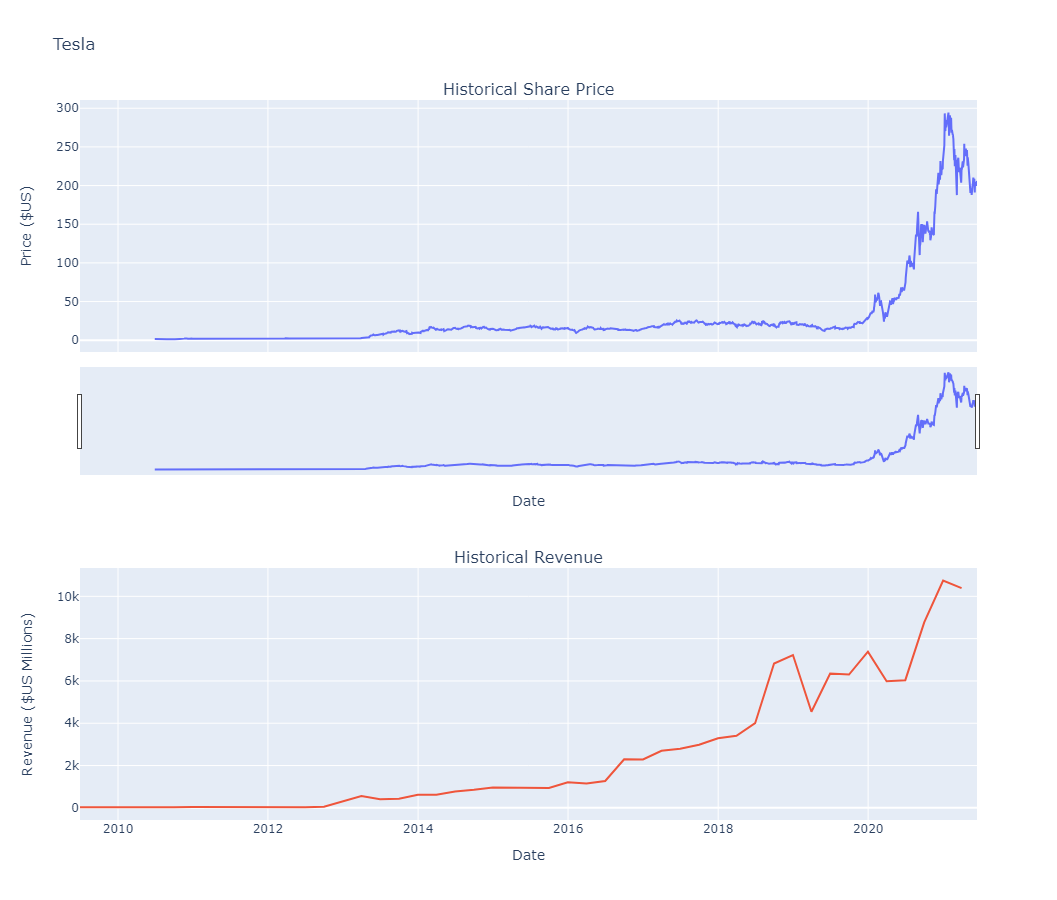

In [28]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

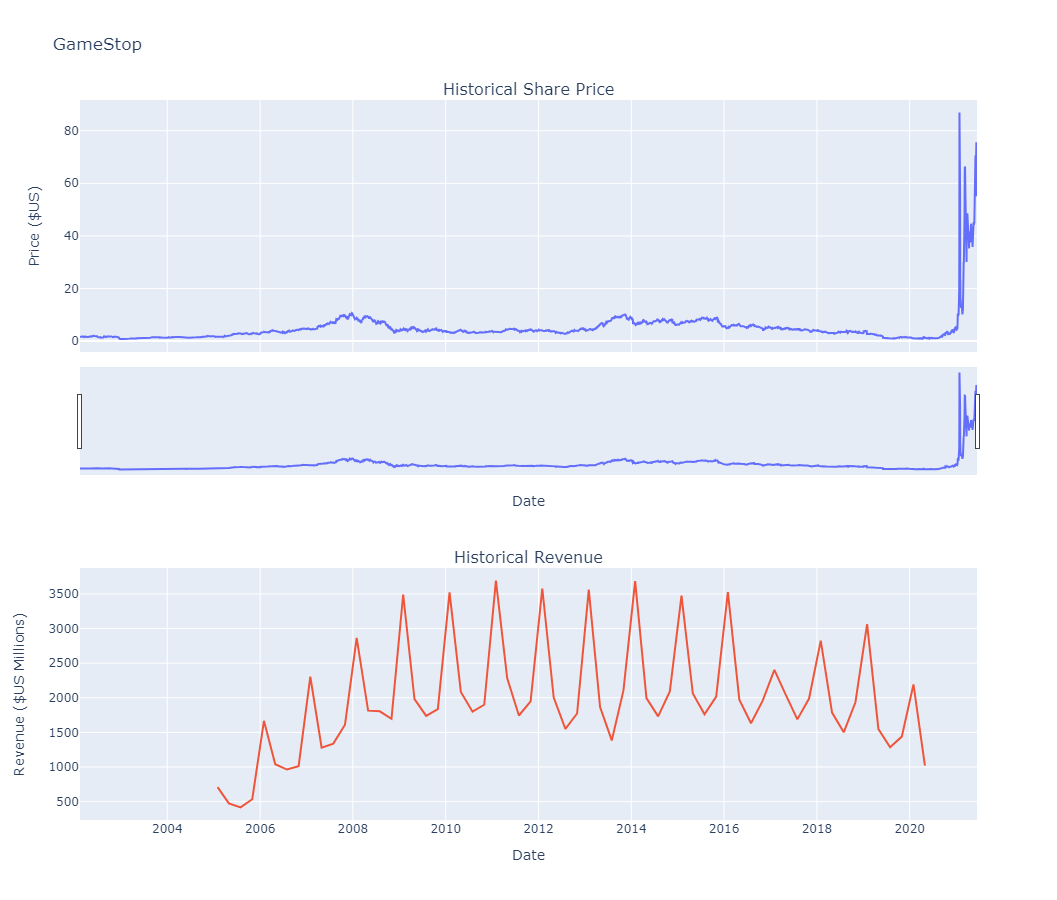

In [29]:
make_graph(gme_data, gme_revenue, 'GameStop')